# **Simple Linear Regression**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/ccdsiub/ml-essentials/blob/master/docs/supervised-learning/regression/linear-regression.ipynb)

## **Problem Statement**

In this notebook, we will predict sales revenue for a given advertising budget using a simple linear regression model. For this purpose, we will use the kaggle dataset [Advertising.csv](https://www.kaggle.com/ashydv/advertising-dataset). The dataset consists of 200 rows of data, each representing a market with the following attributes:

- `TV`: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- `Radio`: advertising dollars spent on Radio
- `Newspaper`: advertising dollars spent on Newspaper
- `Sales`: sales of a single product in a given market (in thousands of widgets)

We will try to predict sales using the three other features.

## **Import necessary packages**

We will use the following packages for this tutorial:

- `pandas` to load and manipulate data
- `numpy` to work with arrays of data
- `matplotlib` and `seaborn` for plotting and visualization
- `sklearn` for machine learning and data analysis tools

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## **Load the data**

Download the dataset from [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/ccdsiub/ml-essentials/blob/master/docs/supervised-learning/regression/datasets/Advertising.csv). Click on the folder icon on the left panel of colab and create a folder named `datasets`. Then upload the dataset to the `datasets` folder.

We will use the `pd.read_csv()` function to read the dataset into a pandas dataframe. We will also use the `head()` function to display the first five rows of the dataframe.

In [2]:
data = pd.read_csv('datasets/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## **Explor the data**

At first, we will try to understand the data by exploring it. We will use the `info()` function to get a brief information about the dataframe.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


From the output, we can see that the dataframe has 200 rows and 4 columns. The columns are named `TV`, `Radio`, `Newspaper`, and `Sales`. The `Sales` column is the target variable and the other three columns are the features. The `info()` function also shows that there are no missing values (null values) in the dataframe and all the values are numerical (float64).

Next, we will use the `describe()` function to get some statistical information about the dataframe.

In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


From the output, we can see that the average sales revenue is 15.13 thousand dollars with a standard deviation of 5.29 thousand dollars. The minimum sales revenue is 1.6 thousand dollars and the maximum sales revenue is 27 thousand dollars. The average advertising budget for TV, Radio, and Newspaper are 147, 23, and 30 thousand dollars respectively.

Also, we got a brief idea about the distribution of the data from the `describe()` function. For example, the maximum advertising budget for TV is 296 thousand dollars and the minimum is 0.7 thousand dollars. The average advertising budget for TV is 147 thousand dollars and the standard deviation is 85 thousand dollars. The 25th percentile, 50th percentile, and 75th percentile values are 74, 149, and 218 thousand dollars respectively meaning that 25% of the markets have an advertising budget of less than 74 thousand dollars, 50% of the markets have an advertising budget of less than 149 thousand dollars, and 75% of the markets have an advertising budget of less than 218 thousand dollars for TV. The same information can be obtained for the other features.

## **Visualize the data**

To get a better understanding of the data, we will visualize it using the `matplotlib` and `seaborn` packages.

### **Boxplot**
At first we will draw a boxplot for each of the features to get an idea about the distribution of the data and to identify any outliers.

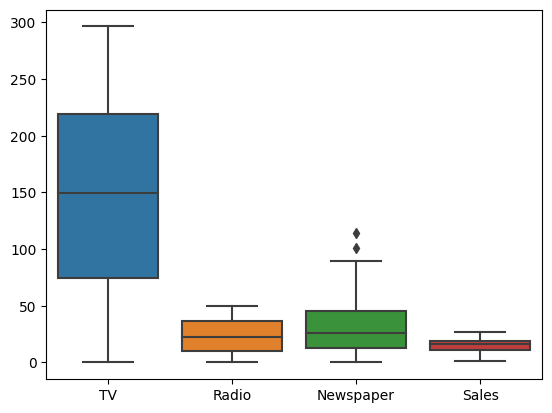

In [5]:
sns.boxplot(data=data, orient='v')
plt.show()

From the boxplots, we can see that there are two outliers in the `Newspaper` feature. The outliers are the two points above the maximum value. We will remove these two points from the dataset.

### **Remove outliers**

We will use update the dataframe by taking only the rows where the budget for `Newspaper` is less than 90 thousand dollars, as the outliers are above 90 thousand dollars.

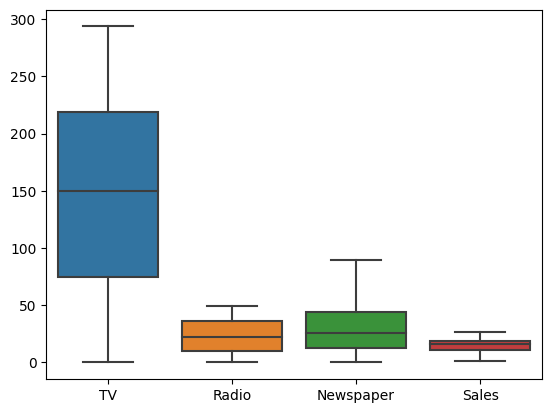

In [6]:
data = data[data['Newspaper'] < 90]
sns.boxplot(data=data, orient='v')
plt.show()

From the boxplots, we can see that there are no outliers in the `Newspaper` feature.

### **Pairplot**

Next, we will draw a pairplot to visualize the relationship between the features and the target variable. The pairplot will also show the correlation between the features and the distribution of the data.

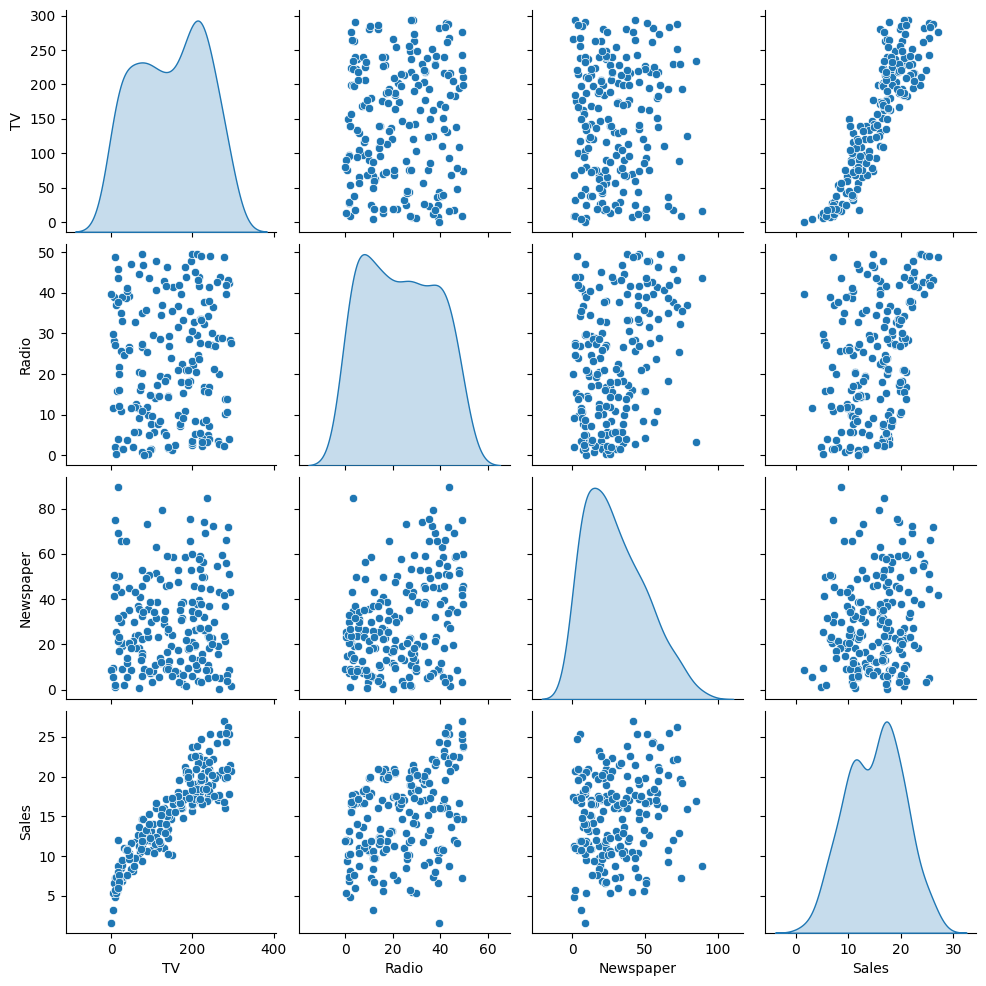

In [7]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

From the pairplot, we can conclude the following:

- No or very little linear relationship between TV and Radio
- Low linear relationship between TV and Newspaper
- Moderate linear relationship between Radio and Newspaper
- High linear relationship between TV and Sales, Radio and Sales, and Newspaper and Sales
- A small curvilnear relationship between TV and Sales as well as Radio and Sales


### **Correlation matrix**

To get a numerical idea about the correlation between the features and the target variable, we will draw a correlation matrix.

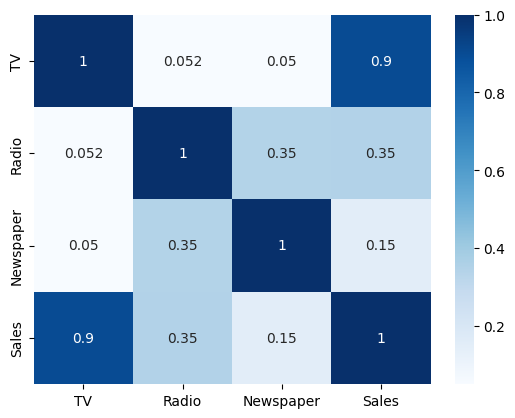

In [19]:
matrix = data.corr()
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()

This plot further quantifies the relationship between the features and the target variable, and confirms our observations from the pairplot.

## **Prepare the data**

Before we can train a machine learning model, we need to prepare the data.